In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
data = pd.read_csv('train.csv')

In [3]:
#understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       700 non-null    object 
 1   Open       700 non-null    float64
 2   High       700 non-null    float64
 3   Low        700 non-null    float64
 4   Close      700 non-null    float64
 5   Adj Close  700 non-null    float64
 6   Volume     700 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.4+ KB


In [4]:
# getting the shape of the data
print(data.shape)

(700, 7)


In [5]:
#check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()

Date    700
dtype: int64

In [6]:
#check the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


In [7]:
data["close"]=pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
train_data= data.iloc[:,4:5].values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       700 non-null    object 
 1   Open       700 non-null    float64
 2   High       700 non-null    float64
 3   Low        700 non-null    float64
 4   Close      700 non-null    float64
 5   Adj Close  700 non-null    float64
 6   Volume     700 non-null    int64  
 7   close      700 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 43.9+ KB


In [9]:
sc = MinMaxScaler(feature_range = (0,1))
train_data = sc.fit_transform(train_data)
train_data.shape

(700, 1)

In [10]:
x_train = []
y_train = []

In [11]:
for i in range (60,700):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(640, 60, 1)

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#train recurrent neural network (RNN) model
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20

20/20 - 17s - loss: 0.0279 - 17s/epoch - 848ms/step
Epoch 2/20
20/20 - 3s - loss: 0.0041 - 3s/epoch - 131ms/step
Epoch 3/20
20/20 - 3s - loss: 0.0035 - 3s/epoch - 134ms/step
Epoch 4/20
20/20 - 3s - loss: 0.0026 - 3s/epoch - 131ms/step
Epoch 5/20
20/20 - 3s - loss: 0.0027 - 3s/epoch - 135ms/step
Epoch 6/20
20/20 - 3s - loss: 0.0026 - 3s/epoch - 136ms/step
Epoch 7/20
20/20 - 3s - loss: 0.0020 - 3s/epoch - 136ms/step
Epoch 8/20
20/20 - 3s - loss: 0.0030 - 3s/epoch - 130ms/step
Epoch 9/20
20/20 - 3s - loss: 0.0025 - 3s/epoch - 132ms/step
Epoch 10/20
20/20 - 3s - loss: 0.0019 - 3s/epoch - 131ms/step
Epoch 11/20
20/20 - 3s - loss: 0.0023 - 3s/epoch - 134ms/step
Epoch 12/20
20/20 - 3s - loss: 0.0028 - 3s/epoch - 130ms/step
Epoch 13/20
20/20 - 3s - loss: 0.0027 - 3s/epoch - 130ms/step
Epoch 14/20
20/20 - 3s - loss: 0.0021 - 3s/epoch - 143ms/step
Epoch 15/20
20/20 - 3s - loss: 0.0025 - 3s/epoch - 148ms/step
Epoch 16/20
20/20 - 3s - loss: 0.0021 - 3s/epoch - 125ms/step
Epoch 17/20
20

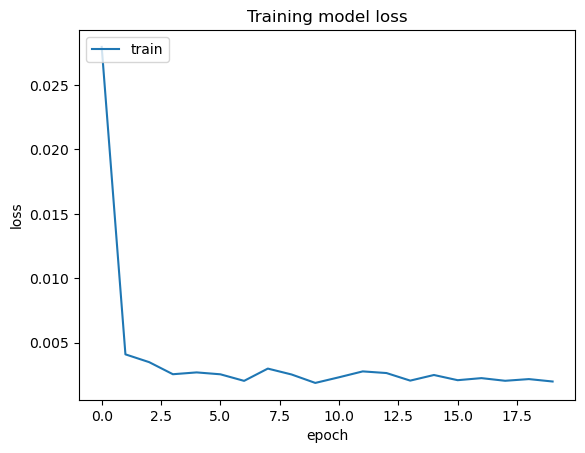

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [16]:
test_data = pd.read_csv('test.csv')
test_data["Close"] = pd.to_numeric(test_data.Close, errors = 'coerce')
test_data = test_data.dropna()
test_data = test_data.iloc[:,4:5]
y_test = test_data.iloc[60:,0:].values

#input array for the model
input_closing = test_data.iloc[:,0:].values
input_closing_scaled = sc.transform(input_closing)
input_closing_scaled.shape
x_test = []
length = len(test_data)
time_step = 60
for i in range (time_step, length):
    x_test.append(input_closing_scaled[i-time_step:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(119, 60, 1)

In [17]:
y_pred = model.predict(x_test)

4/4 [==============================] - 3s 58ms/step


In [18]:
predicted_price = sc.inverse_transform(y_pred)

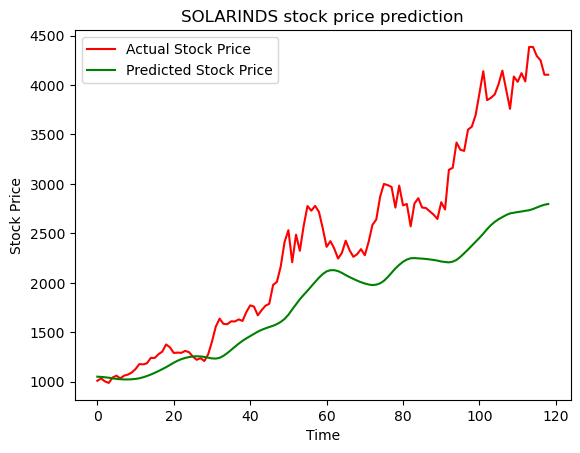

In [19]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('SOLARINDS stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

# Assuming y_test and predicted_price have the same shape
mse = mean_squared_error(y_test, predicted_price)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 538641.0279880879
